# Investigating Fandango Movie Ratings

## Introduction

n October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator).He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Collecting and Understanding the Data

We'll try to understand whether there has been any change in Fandangp's rating system by comparing the system's characteristics before and after Hickey's analysis. We will use two ready data sets:

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srs
%matplotlib inline

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Now we'll isolate the column wiche offer un information about Fandango's ratings.

In [3]:
#Extracting relevant columns
before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue',
                 'Fandango_votes', 'Fandango_Difference']]
after = after[['movie', 'year', 'fandango']]

before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determain if there was any change in Fandago's rating system after Hickey's analysis was published. Therefore, our research  population is all the movies ratings in Fandango's website. 

To perform our analysis we need two categories of data. One, about movies ratings in Fandango's website before Hickey's analysis, and the other, about movies ratings in Fandango's after Hickey's analysis. Fortunately our data set's fall under these categories.

We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

Clearly, both of the data set's are not representative. Both samplings weren't random.

Both of these authors had certain question in mind when they took these samples, so they used a set of criteria to get a sample that would fit their questions. This kind of sampling method is called selective sampling.  While these samples were good enough for their research, they don't seem too useful for us.

## Changing the Goal of our Analysis

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

Our new goal will be to determain whether there is any difference between Fandango's ratings for popular movies in 2015, and Fandango's ratings for popular movies in 2016. This goal is fairly a good proxy for our initial goal.

## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

The second data sets doesn't provide information about the number of fan ratings, and this raises representativity issues once again.

We will have to check in ourselve, ideally, at least 8 out of the 10 movies have 30 fan ratings or more. We'll take a random sample of 10 movies and manualy etract their ratings out.

In [5]:
after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of October 20198, these are the fan ratings we found:

|movie                                  |Fan Rating| 
|---------------------------------------|----------|
|Mechanic: Resurrection                 |2247      |
|Warcraft                               |7271      |
|Max Steel                              |493       |
|Me Before You                          |5263      |
|Fantastic Beasts and Where to Find Them|13400     |
|Cell                                   |17        |
|Genius                                 |127       |
|Sully                                  |11877     |
|A Hologram for the King                |500       |
|Captain America: Civil War             |35057     |

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

If e explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

First we will isolate the movies released in 2015 in a separate data set.

We'll start with Hickey's data set. There is no special column for release year in his data set, but we should be able to extract it rom the 'FILM' column.

In [6]:
before.head(1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5


In [7]:
before['Year'] = before['FILM'].str[-5:-1]
before.head(1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015


In [8]:
before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

There are movies from 2014 and 2015 in Hickey's data, we will isolate only the movies from 2015.

In [9]:
fandango_2015 = before[before['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now let's isolate the movies in the second data set:

In [10]:
after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = after[after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

After all these steps, we can finaly start analyzing te two samples. Our goal is to determine wether there's any difference between ratings in the two samples.

We will start with an high-level comparison between the shapes of the two distributions.

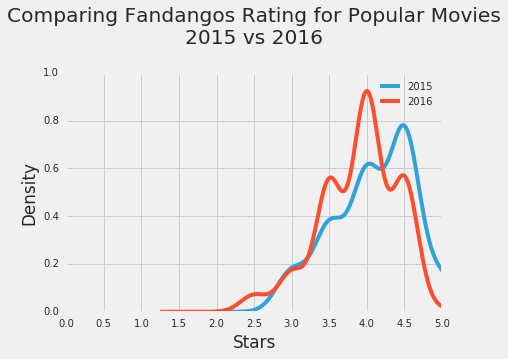

In [28]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title('Comparing Fandangos Rating for Popular Movies\n2015 vs 2016',
         y = 1.1)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,.5))
plt.show()

We can realize from the figure above two facts:

- Both distributions are strongly left skewed.
- The 2016 distridution is slightly left shifted, relative to the 2015 distribution.

The fact that both distributions are left skewed  suggests that movies on Fandangos are given, mostly, very high rating.

The slight shift of the 2016 distribution though, is very relevant for our analysis. It tells us that there was a difference in Fandango's ratings for popular movies after Hickey's analysis. The figure also tells un the direction of the difference, the 2016 ratings are slightly lower compared to 2015.

## Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

We will examine the frquency distribution tables of the two distributions. The samples have different number of movies, therefore we will normalize the tables and use percentages.

In [31]:
print('2015\n' + '-'*16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [32]:
print('2016\n' + '-'*16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

## Determining the Direction of the Change

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We will compare these statistics to determine what they tell about the direction of the difference.

In [34]:
summary = pd.DataFrame()

mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]

summary.index = ['mean', 'median', 'mode']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


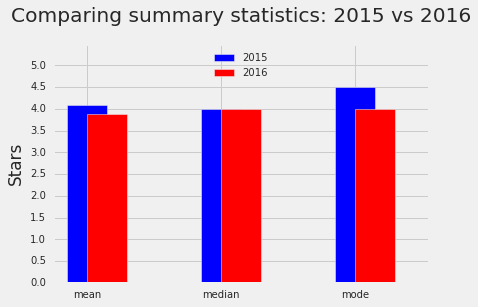

In [47]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(label = '2015', legend = True, color = 'blue', align = 'center', width = 0.3)
summary['2016'].plot.bar(label = '2016', legend = True, color = 'red', align = 'edge'
                         , width = 0.3, rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2. While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.